In [15]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..'))) # imports top level

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import display
import scipy
from collections import defaultdict

import random

In [17]:
plt.rc('font', **{"size": 12})

In [18]:
df = pd.read_excel("input.xlsx", sheet_name="test")

In [19]:
dis = display.Display(df=df)
dis.quick_processing()

The columns with prefix  are not in DataFrame
The columns with prefix None are not in DataFrame


In [20]:
df = dis.df

In [21]:
df

,Name,7-6_s,7-5_s,7-4_s,7-3_s,6-6_s,6-5_s,6-4_s,6-3_s,5-6_s,...,average_t,right_center_side_t,left_center_side_t,right_side_t,left_side_t,center_t,qul_t,qur_t,qll_t,qlr_t
0,128,1.007261,1.039308,0.780477,0.671881,0.903992,1.340501,1.005525,0.899053,1.312518,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
1,126,1.014851,1.155958,0.936798,0.883959,0.950221,0.804825,1.263511,1.162170,0.763771,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
2,127,1.008279,1.086415,0.837248,0.759608,0.967771,0.790417,1.156539,1.005604,1.361782,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
3,123,0.647791,1.064173,1.098479,1.042141,1.066111,1.027449,0.806435,1.396153,0.931250,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
4,120,0.587420,1.084638,1.229904,0.938634,0.643358,1.204374,1.016986,0.932845,1.086926,...,282.50,286.0,279.0,286.0,279.0,282.5,279.0,286.0,279.0,286.0
5,121,1.142254,1.087766,1.194483,0.851884,0.689963,1.235851,0.941317,0.823667,1.140019,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
6,129,0.717581,0.998936,1.204193,1.014046,0.814873,1.287133,1.022199,0.949048,1.165208,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
7,124_2022.05.23,0.608411,1.049913,1.054652,1.019652,1.040481,0.941543,1.400093,1.321300,0.891886,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
8,123_2022.02.14,0.647791,1.064173,1.098479,1.042141,1.066111,1.027449,0.806435,1.396153,0.931250,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0
9,129_end,0.716972,0.997293,1.172891,0.989092,0.817093,1.272100,0.962573,0.896618,1.174517,...,284.25,286.0,282.5,286.0,279.0,286.0,279.0,286.0,286.0,286.0


In [22]:
[i for i in df.columns if "average" in i]

['average_s', 'average_l', 'average_p', 'average_b', 'average_t']

# 1 Generator of cores
## At the momemt only 8th tube FA can be used to generate new core

In [23]:
p_cols = dis.CORE_PARTS["percentage"]["ALL_CELLS"]
t_cols = dis.CORE_PARTS["fuel_type"]["ALL_CELLS"]

In [24]:
ancestor_0 = df.loc[5, :]

In [25]:
c = list(
    ancestor_0.loc[p_cols].to_numpy()[[0,1,2,3,9,10,11,16,17,18,19]]
)

In [26]:
top_storage = {}

In [50]:
pop = 150
top_storage[pop] = {}

rnm = []

for _ in range(pop):
    rnm.append(
        np.asarray(random.sample(c, k=11))
    )
rnm = np.array(rnm)
med = pop / 11

In [51]:
from collections import Counter, defaultdict
from scipy.optimize import curve_fit

In [52]:
counts = []
for i in range(11):
    counter = Counter()
    counter.update(
            rnm[:, i]
        )
    counts.append(
        counter.most_common()
    )

In [53]:
storage = {}
storage["mean"] = med
x = np.arange(0,11)

In [54]:
stds = []
for val in c:
    storage[val] = {}
    storage[val]["counts"] = []
    storage[val]["stats"] = {}
    for cell in counts:
        for (vl, count) in cell:
            if val == vl:
                storage[val]["counts"].append(count)
    
    
    stds.append(
        np.array(storage[val]["counts"]).std()
    )
    storage[val]["stats"]["std"] = np.array(storage[val]["counts"]).std()
storage["std"] = np.asarray(stds).mean()
    

In [55]:
storage

{'mean': 13.636363636363637,
 3.36: {'counts': [10, 13, 16, 11, 13, 16, 18, 10, 13, 17, 13],
  'stats': {'std': 2.637930568826711}},
 17.119999999999997: {'counts': [6, 7, 18, 16, 18, 12, 14, 18, 7, 15, 19],
  'stats': {'std': 4.695698752779984}},
 6.52: {'counts': [20, 13, 8, 9, 17, 20, 12, 13, 13, 11, 14],
  'stats': {'std': 3.772453440226623}},
 48.58: {'counts': [16, 19, 18, 10, 11, 8, 13, 16, 14, 14, 11],
  'stats': {'std': 3.2828127427759615}},
 36.57: {'counts': [8, 11, 17, 17, 11, 18, 12, 17, 11, 12, 16],
  'stats': {'std': 3.2550025072669375}},
 3.7899999999999996: {'counts': [17, 10, 13, 12, 12, 12, 15, 9, 23, 12, 15],
  'stats': {'std': 3.6747968966195885}},
 36.39: {'counts': [10, 17, 9, 17, 15, 11, 8, 15, 17, 14, 17],
  'stats': {'std': 3.3377381364883307}},
 41.99: {'counts': [21, 15, 12, 9, 13, 13, 11, 11, 21, 14, 10],
  'stats': {'std': 3.8440680930665407}},
 8.89: {'counts': [13, 17, 10, 13, 12, 13, 12, 14, 14, 17, 15],
  'stats': {'std': 2.0123585110162416}},
 16.64: 

In [56]:
top_storage[pop] = storage.copy()

In [57]:
top_storage

{80: {'mean': 7.2727272727272725,
  3.36: {'counts': [11, 3, 6, 6, 7, 7, 7, 12, 10, 6, 5],
   'stats': {'std': 2.561636873382795}},
  17.119999999999997: {'counts': [7, 9, 10, 3, 8, 8, 12, 10, 4, 6, 3],
   'stats': {'std': 2.86327559054975}},
  6.52: {'counts': [6, 4, 7, 13, 5, 7, 8, 5, 5, 8, 12],
   'stats': {'std': 2.766386191764171}},
  48.58: {'counts': [7, 6, 4, 7, 9, 6, 12, 4, 7, 8, 10],
   'stats': {'std': 2.2998382983042758}},
  36.57: {'counts': [7, 11, 6, 10, 9, 4, 5, 9, 6, 3, 10],
   'stats': {'std': 2.5616368733827946}},
  3.7899999999999996: {'counts': [7, 9, 9, 6, 6, 5, 7, 5, 10, 10, 6],
   'stats': {'std': 1.8136306675690914}},
  36.39: {'counts': [7, 8, 6, 7, 10, 9, 8, 1, 4, 12, 8],
   'stats': {'std': 2.7990553306073913}},
  41.99: {'counts': [8, 7, 8, 8, 4, 9, 5, 6, 8, 8, 9],
   'stats': {'std': 1.5427784316797402}},
  8.89: {'counts': [4, 9, 8, 9, 9, 4, 9, 10, 8, 5, 5],
   'stats': {'std': 2.178027009220171}},
  16.64: {'counts': [7, 7, 9, 6, 7, 10, 4, 11, 6, 5, 8],


In [58]:
pops = list(top_storage.keys())
pop_std = []

for pop in pops:
    pop_std.append(
        top_storage[pop]["std"] / top_storage[pop]["mean"] * 100
    )


In [59]:
elapsed_time = [
    0.26,  # pop = 10
    0.45,  # pop = 30
    0.60,  # pop = 50
    0.86,  # pop = 80
    1.01,  # pop = 100
    1.50,  # pop = 150
    1.95,  # pop = 200
    2.81,  # pop = 300
    3.75,  # pop = 400
    4.85,  # pop = 500
    5.72,  # pop = 600
    7.92,  # pop = 800
    10.71,  # pop = 1000
]

In [60]:
def exp_appx(x, b, m, c):
    return b * np.exp(-m*x) + c

In [62]:
# fig, ax = plt.subplots()

# sns.scatterplot(
#     x=pops,
#     y=pop_std,
#     # ax=ax,
#     label="Коэффициент вариации"
# )

# popt, _ = curve_fit(
#     exp_appx,
#     pops,
#     pop_std
# )

# x = np.linspace(0, 1000, 100)
# sns.lineplot(
#     x=x,
#     y=exp_appx(x, popt[0], popt[1], popt[2]),
#     alpha=0.5,
#     linestyle="--"
    
# )

# ax.set_xlabel("Размер популяции")
# ax.set_ylabel("Коэффициент вариации, %")
# ax.set_ylim(0,70)


In [63]:
from model import Individual, GA, FITNESS_WEIGHTS_WINDOW, TARGET, Stacking, nonuniformity
from joblib import load, dump

In [68]:
weights = {
    "p_margin": 0.10, # use fuel burnup coef instead of this
    "k_fa_max": 0.10,
    "k_quarter": 0.30, # modify in order to estimate this symmetry more accurate 
    "k_sym": 0.30,
    "k_sided":0.20
}


# weights = {
#     "p_margin": 0.20, # use fuel burnup coef instead of this
#     "k_fa_max": 0.20,
#     "k_quarter": 0.20, # modify in order to estimate this symmetry more accurate 
#     "k_sym": 0.20,
#     "k_sided":0.20
# }

In [69]:
# replace spent fuel
ancestor_0["6-6_p"] = 0.0
ancestor_0["3-6_p"] = 0.0

/tmp/ipykernel_12437/2188098015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0["6-6_p"] = 0.0
/tmp/ipykernel_12437/2188098015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0["3-6_p"] = 0.0


In [70]:
ga = GA.no_fuel_mask(
    ancestor_0.loc[p_cols].to_numpy(), 
    ancestor_0.loc[t_cols].to_numpy(),
    population_size=300,
    mate_probability=0.6,
    permutation_mutation_probability=0.3,
    mutation_probabilty_fresh_fuel=0.4,
    fitness_weights=weights,
    workers=6
)
indiv = Individual(
    fuel_map=ga.fuel_map,
    dynamic_fuels_gnome_ind=ga.dynamic_fuels_gnome_ind,
)

{'p_margin': 0.1, 'k_fa_max': 0.1, 'k_quarter': 0.3, 'k_sym': 0.3, 'k_sided': 0.2}


In [71]:
indiv.fitness_score(indiv, *TARGET)

(1.0, 1.0, 1.0, 1.0, 1.0)

In [72]:
ancestor_chromosome = indiv.initialize_chromosome(
    ancestor_0.loc[p_cols].to_numpy(), 
    0
)
ancestor_chromosome

{'id': 0,
 'fuels_gnome': array([3.36, 17.119999999999997, 6.52, 48.58, 0.0, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 36.57,
        3.7899999999999996, 36.39, 0.0, 47.06999999999999, 26.19, 55.19,
        41.99, 8.89, 16.64, 47.53], dtype=object),
 'core_burnup': 28.1,
 'p_margin': 0.9140630736239674,
 'k_fa_max': 0.9164482241362819,
 'k_fa_min': 0.7116372185740154,
 'k_quarter': 0.8702509198328968,
 'k_sym': 0.7906464270764968,
 'k_left_right': 0.8187060986948274,
 'fitness_score': 0.8651197595518637}

In [73]:
dis.display(
    ancestor_chromosome["fuels_gnome"]
)

,6,5,4,3
7,3.360000,17.120000,6.520000,48.580000
6,0.000000,26.510000,51.570000,57.940000
5,29.390000,nan,nan,36.570000
4,3.790000,nan,nan,36.390000
3,0.000000,47.070000,26.190000,55.190000
2,41.990000,8.890000,16.640000,47.530000


In [74]:
dis.display(
        Stacking.predict(
            indiv._fuels_gnome_refactorer(indiv, np.asarray(ancestor_chromosome["fuels_gnome"])),
            nonuniformity
    ).loc[0, :]*300,
    dt="_s"
)

,6,5,4,3
7,344.025116,320.195676,338.121250,238.271590
6,370.686149,352.514779,263.737381,230.622552
5,338.551969,nan,nan,333.562568
4,390.078639,nan,nan,318.351655
3,346.046143,257.262892,323.161210,217.122494
2,229.071148,304.022001,276.856454,213.491166


# DO search

In [671]:
random.seed(2)

over_iter_best_solutions = []
over_iter_aver_score = []

over_iter_trained = []

for n in range(5):

    trained_population = ga.search(
        generations=100,
        population_score=0.92,
        ind_score=0.97
    )
    
    over_iter_best_solutions.append(
        ga._best_per_iter.copy()    
    )
    over_iter_aver_score.append(
        ga._aver_score_per_iter.copy()    
    )

    over_iter_trained.append(
        trained_population.copy()
    )
    
    ga._best_per_iter = []
    ga._aver_score_per_iter = []

start search with populations score: 0.7382168283634198and burnup 34.199999999999996
average populations score 0.7582135804865742 and burnup 33.346 at the end of 1 generation
15.327121257781982
average populations score 0.7700606143023545 and burnup 32.715666666666664 at the end of 2 generation
10.677832126617432
average populations score 0.7793956833179377 and burnup 32.187 at the end of 3 generation
7.687668323516846
average populations score 0.7885412953383953 and burnup 31.67866666666666 at the end of 4 generation
5.870791673660278
average populations score 0.798340001565116 and burnup 31.17033333333333 at the end of 5 generation
4.795895576477051
average populations score 0.8048646329560253 and burnup 30.804333333333332 at the end of 6 generation
4.027741193771362
average populations score 0.8124488212021626 and burnup 30.356999999999996 at the end of 7 generation
3.3283066749572754
average populations score 0.8179881436424229 and burnup 30.051999999999996 at the end of 8 generati

In [698]:
dis.display(trained_population[0]["fuels_gnome"])

,6,5,4,3
7,48.580000,3.790000,8.890000,17.120000
6,0.000000,26.510000,51.570000,57.940000
5,29.390000,nan,nan,36.390000
4,36.570000,nan,nan,41.990000
3,0.000000,47.070000,26.190000,55.190000
2,47.530000,6.520000,3.360000,16.640000


In [699]:
dis.display(
        Stacking.predict(
            indiv._fuels_gnome_refactorer(indiv, np.asarray(trained_population[0]["fuels_gnome"])),
            nonuniformity
    ).loc[0, :]*300,
    dt="_s"
)

,6,5,4,3
7,227.633029,336.278831,325.813070,319.161017
6,343.752104,338.237089,269.489830,239.724231
5,313.685474,nan,nan,349.243216
4,293.545645,nan,nan,321.545744
3,337.890641,263.892041,334.829246,235.111647
2,218.427409,321.819497,313.978385,300.063075


In [700]:
weights_str = list(map(lambda x: str(x), list(weights.values())))

In [701]:
dump(
    over_iter_trained,
    f"ga_params_search/121_300ps_{'_'.join(weights_str)}_finished.joblib"
)


['ga_params_search/121_300ps_0.1_0.1_0.4_0.4_finished.joblib']

In [702]:
over_iter_best_solutions

[[{'id': 231,
   'fuels_gnome': array([3.7899999999999996, 36.39, 8.89, 41.99, 61.47, 26.51,
          51.56999999999999, 57.940000000000005, 29.39, 36.57, 16.64, 48.58,
          60.9, 47.06999999999999, 26.19, 55.19, 6.52, 3.36, 47.53,
          17.119999999999997], dtype=object),
   'core_burnup': 34.2,
   'p_margin': 0.6061008207377907,
   'k_fa_max': 1.1257187162823805,
   'k_fa_min': 0.6828575380932307,
   'k_quarter': 0.9780408210917708,
   'k_sym': 0.7818142468612296,
   'k_left_right': 1.024311706276442,
   'fitness_score': 0.8771239808832173},
  {'id': 163,
   'fuels_gnome': array([36.39, 3.36, 48.58, 41.99, 0.0, 26.51, 51.56999999999999,
          57.940000000000005, 29.39, 6.52, 17.119999999999997,
          3.7899999999999996, 0.0, 47.06999999999999, 26.19, 55.19, 16.64,
          36.57, 8.89, 47.53], dtype=object),
   'core_burnup': 28.1,
   'p_margin': 0.9369771071089619,
   'k_fa_max': 0.8800030045753926,
   'k_fa_min': 0.7641422883738702,
   'k_quarter': 0.949668816284

In [703]:

dump(
    over_iter_best_solutions,
    f"ga_params_search/weights_search/121_300ps_{'_'.join(weights_str)}_best.joblib"
)
dump(
    over_iter_aver_score,
    f"ga_params_search/weights_search/121_300ps_{'_'.join(weights_str)}_aver.joblib"
)

['ga_params_search/weights_search/121_300ps_0.1_0.1_0.4_0.4_aver.joblib']

In [704]:
data_1_1_4_4 = load(
    "ga_params_search/weights_search/121_300ps_0.1_0.1_0.4_0.4_best.joblib"
)
data_1_1_4_4_aver = load(
    "ga_params_search/weights_search/121_300ps_0.1_0.1_0.4_0.4_aver.joblib"
)

data_25_25_25_25 = load(
    "ga_params_search/weights_search/121_300ps_0.25_0.25_0.25_0.25.joblib"
)

data_2_1_35_35 = load(
    "ga_params_search/weights_search/121_0.2_0.1_0.35_0.35.joblib"
)

In [705]:
# upload over iter collection of population of final iteration
data_over_iter = load(
    "ga_params_search/121_300ps_0.1_0.1_0.4_0.4_finished.joblib"
    # "ga_params_search/121_300ps_0.25_0.25_0.25_0.25_finished.joblib"
)

In [706]:
from operator import add
from functools import reduce

In [707]:
data_over_iter = [i for lst in data_over_iter for i in lst]


In [727]:
datas_aver = []
for data in data_1_1_4_4_aver[0:1]:
    for d in data:
        datas_aver.append(
            d
        )
datas_aver.sort()

In [728]:
datas = data_1_1_4_4[0:1]
# datas = data_25_25_25_25

In [729]:
solutions = []
solutions_fs = []

solutions = [i for lst in datas for i in lst]
# print(solutions)

solutions = sorted(solutions, key=lambda x: x["fitness_score"])
solutions_fs = [i["fitness_score"] for i in solutions]
    # solutions_fs.append(solution_fs)


In [730]:
#* sort over iter by fs
data_over_iter = sorted(data_over_iter, key=lambda x: x["fitness_score"])
data_over_iter_fs = [i["fitness_score"] for i in data_over_iter]

In [731]:
# best
# data_over_iter[-1]
solutions[-1]

{'id': 48,
 'fuels_gnome': array([48.58, 8.89, 3.36, 17.119999999999997, 0.0, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 36.57, 41.99, 36.39,
        0.0, 47.06999999999999, 26.19, 55.19, 47.53, 3.7899999999999996,
        6.52, 16.64], dtype=object),
 'core_burnup': 28.1,
 'p_margin': 0.8835215067582693,
 'k_fa_max': 1.1916088604150605,
 'k_fa_min': 0.7182134810718779,
 'k_quarter': 0.9548748658334638,
 'k_sym': 0.9180478813704119,
 'k_left_right': 0.9693688483028612,
 'fitness_score': 0.9566821355988833}

Text(0.5, 0, 'Количество компоновок')

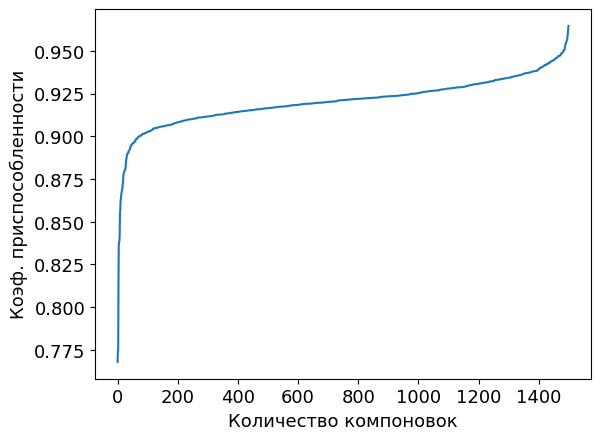

In [732]:
# solutions for last population taken from over_iter_population
# 


sns.lineplot(data_over_iter_fs)
plt.ylabel("Коэф. приспособленности")
plt.xlabel("Количество компоновок")

Text(0.5, 0, 'Итерация')

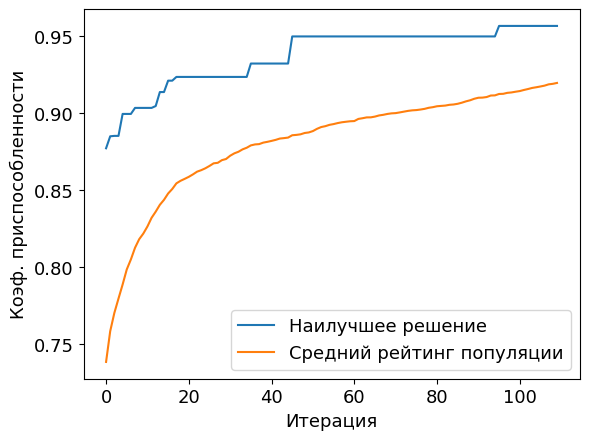

In [733]:
sns.lineplot(
    solutions_fs,
    label="Наилучшее решение"
)
sns.lineplot(
    datas_aver,
    label="Средний рейтинг популяции"
)
plt.ylabel("Коэф. приспособленности")
plt.xlabel("Итерация")

Text(0.5, 0, 'Итерация')

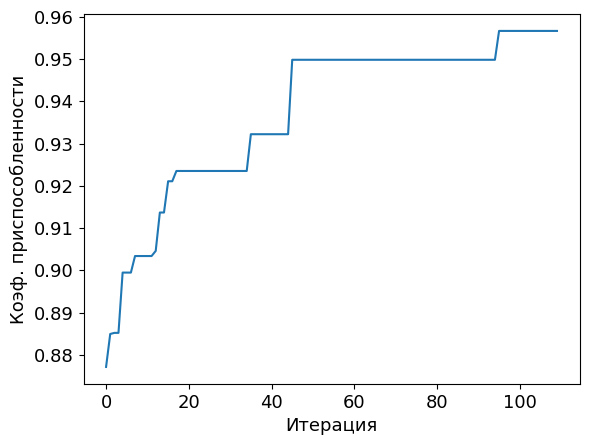

In [734]:
# best solution for .25s
# best taken from every iteration made
plt.rc('font', **{"size": 13})

sns.lineplot(solutions_fs)
plt.ylabel("Коэф. приспособленности")
plt.xlabel("Итерация")

In [735]:
dis.display(solutions[-1]["fuels_gnome"])

,6,5,4,3
7,48.580000,8.890000,3.360000,17.120000
6,0.000000,26.510000,51.570000,57.940000
5,29.390000,nan,nan,36.570000
4,41.990000,nan,nan,36.390000
3,0.000000,47.070000,26.190000,55.190000
2,47.530000,3.790000,6.520000,16.640000


In [743]:
dis.display(
        Stacking.predict(
            indiv._fuels_gnome_refactorer(indiv, np.asarray(solutions[-1]["fuels_gnome"])),
            nonuniformity
    ).loc[0, :]*300,
    dt="_s"
)


,6,5,4,3
7,226.859736,326.808923,335.002574,320.464950
6,339.419007,338.116563,271.136831,242.047411
5,311.553847,nan,nan,352.464650
4,275.936690,nan,nan,341.899016
3,334.228219,262.796953,336.531429,237.211321
2,215.464044,325.146835,309.684547,303.305385


In [736]:
# over data_iter - trained population
tp_ksym = [i["k_sym"] for i in  data_over_iter]
tp_kquarter = [i["k_quarter"] for i in  data_over_iter]

In [753]:
scores = [i["fitness_score"] for i in  solutions]
scores_ksym = [i["k_sym"] for i in  solutions]
scores_kquarter = [i["k_quarter"] for i in  solutions]
scores_kleftright = [i["k_left_right"] if i["k_left_right"] < 1 else 2 - i["k_left_right"] for i in  solutions]

Text(0.5, 0, 'Итерация')

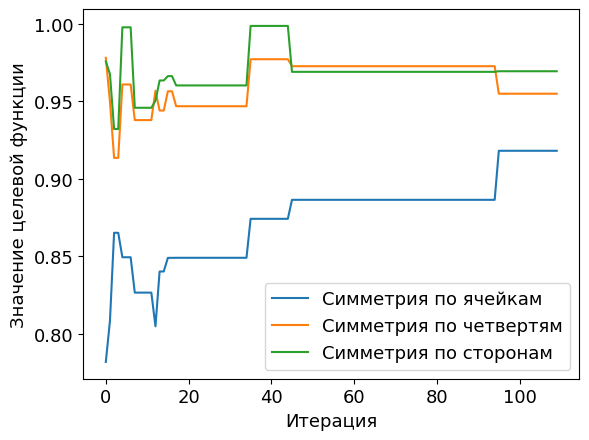

In [755]:
fig, ax = plt.subplots()

sns.lineplot(np.asarray(scores_ksym), label="Симметрия по ячейкам")
sns.lineplot(np.array(scores_kquarter), label="Симметрия по четвертям")
sns.lineplot(scores_kleftright, label="Симметрия по сторонам")

plt.ylabel("Значение целевой функции")
plt.xlabel("Итерация")

# plt.ylim(0.8, 1.01)
# sns.move_legend(ax, )

Text(0, 0.5, 'Коэф. симметрии по ячейкам')

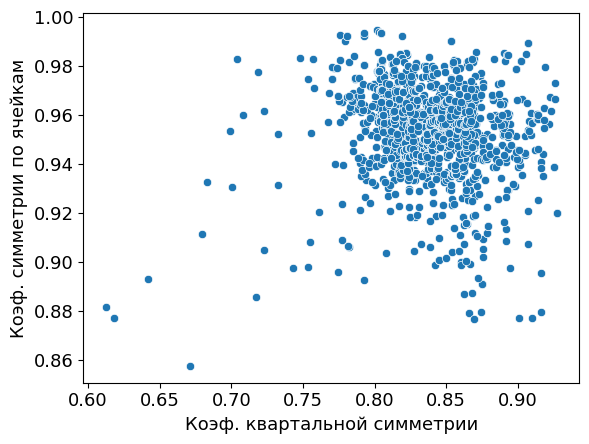

In [739]:
sns.scatterplot(
    x=tp_ksym,
    y=tp_kquarter
)
plt.xlabel("Коэф. квартальной симметрии")
plt.ylabel("Коэф. симметрии по ячейкам")

## Making pngs with fixed size

In [222]:
from pandas import option_context
import dataframe_image as dfi

In [267]:

def make_burnup_pdd_png(
    arr,
    file_name,
):
    d = dis.display(arr)
    d.set_properties(
        **{
            'width': '45px',
            'text-align': 'center'
        }
    )
    d.format("{:.1f}")
    dfi.export(
        d, 
        f'ga_params_search/weights_search/{file_name}.png', 
        table_conversion = 'matplotlib',
        dpi=300
    )
    
    t = dis.display(
            Stacking.predict(
                indiv._fuels_gnome_refactorer(indiv, np.asarray(arr)),
                nonuniformity
        ).loc[0, :] * 300,
        dt="_s"
    )
    t.set_properties(
        **{
            'width': '55px',
            'text-align': 'center'
        }
    )
    t.format("{:.0f}")
    dfi.export(
        t, 
        f'ga_params_search/weights_search/pdd_{file_name}.png',
        table_conversion = 'matplotlib',
        dpi=300
        
    
    )

In [273]:
# create png of worst / best found solution in data_over_iter
make_burnup_pdd_png(
    data_over_iter[-1]["fuels_gnome"],
    f"121_{'_'.join(weights_str)}_best"
)

In [285]:
# create png of best among best solutions in 
make_burnup_pdd_png(
    solutions[0][-1]["fuels_gnome"],
    f"121_{'_'.join(weights_str)}_best"
)

In [283]:
# parent core with refueled 6tubes in 6-6 and 3-6
ancestor_0["6-6_p"] = 0.0
ancestor_0["3-6_p"] = 0.0


ancestor_chromosome = indiv.initialize_chromosome(
    ancestor_0.loc[p_cols].to_numpy(), 
    0
)
ancestor_chromosome

/tmp/ipykernel_26225/3356647643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0["6-6_p"] = 0.0
/tmp/ipykernel_26225/3356647643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0["3-6_p"] = 0.0


{'id': 0,
 'fuels_gnome': array([13.23, 9.58, 41.40999999999999, 49.68, 0.0, 58.42,
        26.369999999999997, 32.6, 0.0, 41.0, 0.0, 40.28, 0.0, 23.94, 57.97,
        31.17, 13.07, 41.010000000000005, 9.54, 47.56], dtype=object),
 'core_burnup': 26.8,
 'p_margin': 0.9652484246439094,
 'k_fa_max': 1.052356873860043,
 'k_fa_min': 0.7114021066708203,
 'k_quarter': 0.8916548069267746,
 'k_sym': 0.9683142208332233,
 'k_left_right': 1.1725046824689953,
 'fitness_score': 0.9693935815659875}

In [470]:
make_burnup_pdd_png(
    # ancestor_chromosome["fuels_gnome"],
    trained_25_25_25_25[49]["fuels_gnome"],
    "121_ancestor"
)
dis.display(ancestor_chromosome["fuels_gnome"])

,6,5,4,3
7,3.360000,17.120000,6.520000,48.580000
6,61.470000,26.510000,51.570000,57.940000
5,29.390000,nan,nan,36.570000
4,3.790000,nan,nan,36.390000
3,60.900000,47.070000,26.190000,55.190000
2,41.990000,8.890000,16.640000,47.530000


In [291]:
# worst core
solutions[2][0]

{'id': 53,
 'fuels_gnome': array([8.89, 3.7899999999999996, 47.53, 16.64, 61.47, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 41.99, 36.57, 36.39,
        60.9, 47.06999999999999, 26.19, 55.19, 17.119999999999997, 6.52,
        3.36, 48.58], dtype=object),
 'core_burnup': 34.2,
 'p_margin': 0.5906136712181049,
 'k_fa_max': 1.1432598510502154,
 'k_fa_min': 0.6734202921683732,
 'k_quarter': 0.9500262833210952,
 'k_sym': 0.7540755878132236,
 'k_left_right': 0.9769767239405274,
 'fitness_score': 0.8288843742456541}

In [497]:
make_burnup_pdd_png(
    solutions[0][-1]["fuels_gnome"],
    "121_300ps_0.1_0.1_0.4_0.4"
)

make_burnup_pdd_png(
    solutions[1][-1]["fuels_gnome"],
    "121_300ps_0.25_0.25_0.25_0.25"
)

# make_burnup_pdd_png(
#     solutions[2][-1]["fuels_gnome"],
#     "121_0.2_0.1_0.35_0.35"
# )

In [498]:
 solutions[0][-1]

{'id': 208,
 'fuels_gnome': array([6.52, 47.53, 3.36, 41.99, 0.0, 26.51, 51.56999999999999,
        57.940000000000005, 29.39, 17.119999999999997, 36.57, 16.64, 0.0,
        47.06999999999999, 26.19, 55.19, 8.89, 3.7899999999999996, 48.58,
        36.39], dtype=object),
 'core_burnup': 28.1,
 'p_margin': 0.9018463297949589,
 'k_fa_max': 1.0389498787768974,
 'k_fa_min': 0.7348004596615567,
 'k_quarter': 0.9660096814912117,
 'k_sym': 0.916284385992334,
 'k_left_right': 1.0335659571056222,
 'fitness_score': 0.9469972478506039}

In [511]:
 solutions[1]

[{'id': 54,
  'fuels_gnome': array([3.36, 6.52, 48.58, 16.64, 61.47, 26.51, 51.56999999999999,
         57.940000000000005, 29.39, 41.99, 36.39, 47.53, 60.9,
         47.06999999999999, 26.19, 55.19, 17.119999999999997, 36.57,
         3.7899999999999996, 8.89], dtype=object),
  'core_burnup': 34.2,
  'p_margin': 0.5748956959677243,
  'k_fa_max': 1.1810242990200868,
  'k_fa_min': 0.6690841268347695,
  'k_quarter': 0.905743314613423,
  'k_sym': 0.8307928129571734,
  'k_left_right': 0.9385794811114301,
  'fitness_score': 0.8731140306396018},
 {'id': 78,
  'fuels_gnome': array([6.52, 17.119999999999997, 3.36, 47.53, 61.47, 26.51,
         51.56999999999999, 57.940000000000005, 29.39, 36.39, 41.99, 36.57,
         60.9, 47.06999999999999, 26.19, 55.19, 3.7899999999999996, 16.64,
         8.89, 48.58], dtype=object),
  'core_burnup': 34.2,
  'p_margin': 0.6063663694838195,
  'k_fa_max': 1.1327806162258882,
  'k_fa_min': 0.6766949828058336,
  'k_quarter': 0.9330289311157252,
  'k_sym': 0.842

In [811]:
# same as data_over_iter
trained_1_1_4_4 = load(
    "ga_params_search/121_300ps_0.1_0.1_0.4_0.4_finished.joblib"
)

In [812]:
# trained_1_1_4_4 = [
#     *trained_1_1_4_4[0],
#     *trained_1_1_4_4[1],
#     *trained_1_1_4_4[2]
# ]

In [813]:
trained_1_1_4_4_solution = sorted(trained_1_1_4_4[0], key=lambda x: x["fitness_score"])
trained_1_1_4_4_solution_fs = [i["fitness_score"] for i in trained_1_1_4_4_solution]

In [814]:
trained_1_1_4_4_solution_pdd = []
for s in trained_1_1_4_4_solution:
    pr = Stacking.predict(
        indiv._fuels_gnome_refactorer(indiv, np.asarray(s["fuels_gnome"])),
        nonuniformity
    ).loc[0, :].to_numpy() * 300

    trained_1_1_4_4_solution_pdd.append(pr)
    

## making a gif

In [815]:
def multiple_copies(
    arr,
    num
):
    arr_2d = []

    for _ in range(num):
        arr_2d.append(
            arr.copy()
        )
    return arr_2d
    

In [816]:
st_point = multiple_copies(
    trained_1_1_4_4_solution[0]["fuels_gnome"],
    6
)
mid_point = multiple_copies(
    trained_1_1_4_4_solution[149]["fuels_gnome"],
    4
)
fn_point = multiple_copies(
    trained_1_1_4_4_solution[-1]["fuels_gnome"],
    6
)

In [817]:
st_point_pdd = multiple_copies(
    trained_1_1_4_4_solution_pdd[0],
    6
)
mid_point_pdd = multiple_copies(
    trained_1_1_4_4_solution_pdd[149],
    4
)
fn_point_pdd = multiple_copies(
    trained_1_1_4_4_solution_pdd[-1],
    6
)

In [818]:
other_points_st_mid = trained_1_1_4_4_solution[1:149:25]
other_points_st_mid = [i["fuels_gnome"] for i in other_points_st_mid]

other_points_mid_fn = trained_1_1_4_4_solution[150:300:25]
other_points_mid_fn = [i["fuels_gnome"] for i in other_points_mid_fn]

In [819]:
other_points_st_mid_pdd = trained_1_1_4_4_solution_pdd[1:149:25]


other_points_mid_fn_pdd = trained_1_1_4_4_solution_pdd[150:300:25]

In [820]:
merged_points = [
    *st_point,
    *other_points_st_mid,
    *mid_point,
    *other_points_mid_fn,
    *fn_point
]

In [821]:
merged_points_pdd = [
    *st_point_pdd,
    *other_points_st_mid_pdd,
    *mid_point_pdd,
    *other_points_mid_fn_pdd,
    *fn_point_pdd
]

In [822]:
merged_points

[array([17.119999999999997, 3.7899999999999996, 41.99, 47.53, 0.0, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 36.39, 16.64, 8.89,
        0.0, 47.06999999999999, 26.19, 55.19, 6.52, 36.57, 48.58, 3.36],
       dtype=object),
 array([17.119999999999997, 3.7899999999999996, 41.99, 47.53, 0.0, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 36.39, 16.64, 8.89,
        0.0, 47.06999999999999, 26.19, 55.19, 6.52, 36.57, 48.58, 3.36],
       dtype=object),
 array([17.119999999999997, 3.7899999999999996, 41.99, 47.53, 0.0, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 36.39, 16.64, 8.89,
        0.0, 47.06999999999999, 26.19, 55.19, 6.52, 36.57, 48.58, 3.36],
       dtype=object),
 array([17.119999999999997, 3.7899999999999996, 41.99, 47.53, 0.0, 26.51,
        51.56999999999999, 57.940000000000005, 29.39, 36.39, 16.64, 8.89,
        0.0, 47.06999999999999, 26.19, 55.19, 6.52, 36.57, 48.58, 3.36],
       dtype=object),
 array([17.119999999999997, 

In [823]:
merged_points_pdd

[array([284.33047311, 328.52785634, 244.19642695, 226.01271284,
        346.12425101, 335.36608589, 260.31082098, 233.6674424 ,
        327.19838665, 339.40791574, 357.33251905, 410.75167735,
        343.36883054, 270.53512048, 346.96025663, 226.43799551,
        302.06911187, 257.70160613, 225.08570907, 328.79697496]),
 array([284.33047311, 328.52785634, 244.19642695, 226.01271284,
        346.12425101, 335.36608589, 260.31082098, 233.6674424 ,
        327.19838665, 339.40791574, 357.33251905, 410.75167735,
        343.36883054, 270.53512048, 346.96025663, 226.43799551,
        302.06911187, 257.70160613, 225.08570907, 328.79697496]),
 array([284.33047311, 328.52785634, 244.19642695, 226.01271284,
        346.12425101, 335.36608589, 260.31082098, 233.6674424 ,
        327.19838665, 339.40791574, 357.33251905, 410.75167735,
        343.36883054, 270.53512048, 346.96025663, 226.43799551,
        302.06911187, 257.70160613, 225.08570907, 328.79697496]),
 array([284.33047311, 328.52785634

In [826]:
def make_burnup_png(
    arr,
    file_name,
    folder,
    only_burn = True
):
    d = dis.display(arr)
    d.set_properties(
        **{
            'width': '45px',
            'text-align': 'center'
        }
    )
    d.format('{:.0f}')
    dfi.export(
        d, 
        f'ga_params_search/{folder}/{file_name}_best.png', 
        table_conversion = 'matplotlib',
        dpi=300
    )

In [825]:
for i in range(len(merged_points)):
    make_burnup_png(
        merged_points[i],
        f"{100+i}_frame_",
        "gif_121_burn"
    )

In [827]:
for i in range(len(merged_points_pdd)):
    make_burnup_png(
        merged_points_pdd[i],
        f"{100+i}_frame_",
        "gif_121_pdd"
    )

In [795]:
from PIL import Image
import glob

In [807]:
frames_path = "ga_params_search/gif_121_burn"
all_frames = os.listdir(frames_path)
all_frames

['100_frame__best.png',
 '101_frame__best.png',
 '102_frame__best.png',
 '103_frame__best.png',
 '104_frame__best.png',
 '105_frame__best.png',
 '106_frame__best.png',
 '107_frame__best.png',
 '108_frame__best.png',
 '109_frame__best.png',
 '110_frame__best.png',
 '111_frame__best.png',
 '112_frame__best.png',
 '113_frame__best.png',
 '114_frame__best.png',
 '115_frame__best.png',
 '116_frame__best.png',
 '117_frame__best.png',
 '118_frame__best.png',
 '119_frame__best.png',
 '120_frame__best.png',
 '121_frame__best.png',
 '122_frame__best.png',
 '123_frame__best.png',
 '124_frame__best.png',
 '125_frame__best.png',
 '126_frame__best.png',
 '127_frame__best.png']

In [808]:
frames_path_pdd = "ga_params_search/gif_121_pdd"
all_frames_pdd = os.listdir(frames_path_pdd)
all_frames_pdd

['100_frame__best.png',
 '101_frame__best.png',
 '102_frame__best.png',
 '103_frame__best.png',
 '104_frame__best.png',
 '105_frame__best.png',
 '106_frame__best.png',
 '107_frame__best.png',
 '108_frame__best.png',
 '109_frame__best.png',
 '110_frame__best.png',
 '111_frame__best.png',
 '112_frame__best.png',
 '113_frame__best.png',
 '114_frame__best.png',
 '115_frame__best.png',
 '116_frame__best.png',
 '117_frame__best.png',
 '118_frame__best.png',
 '119_frame__best.png',
 '120_frame__best.png',
 '121_frame__best.png',
 '122_frame__best.png',
 '123_frame__best.png',
 '124_frame__best.png',
 '125_frame__best.png',
 '126_frame__best.png',
 '127_frame__best.png']

In [809]:
frames = [Image.open(image) for image in glob.glob(f"{frames_path}/*.png")]
frame_one = frames[0]
frame_one.save( "ga_params_search/gif_121_burn/!121_gif_noloop.gif", format="GIF", append_images=frames,
           save_all=True, duration=1500, loop=0)

In [810]:
frames = [Image.open(image) for image in glob.glob(f"{frames_path_pdd}/*.png")]
frame_one = frames[0]
frame_one.save( "ga_params_search/gif_121_pdd/!121_gif_noloop.gif", format="GIF", append_images=frames,
           save_all=True, duration=1500, loop=0)

In [588]:
dis.display(trained_1_1_4_4_solution[0]["fuels_gnome"])

,6,5,4,3
7,9.540000,41.010000,13.070000,13.230000
6,33.200000,58.420000,26.370000,32.600000
5,0.000000,nan,nan,41.000000
4,0.000000,nan,nan,9.580000
3,32.470000,23.940000,57.970000,31.170000
2,47.560000,49.680000,41.410000,40.280000


In [589]:
dis.display(trained_1_1_4_4_solution[149]["fuels_gnome"])

,6,5,4,3
7,13.070000,47.560000,13.230000,41.010000
6,33.200000,58.420000,26.370000,32.600000
5,0.000000,nan,nan,49.680000
4,0.000000,nan,nan,40.280000
3,32.470000,23.940000,57.970000,31.170000
2,9.540000,9.580000,41.000000,41.410000


In [590]:
dis.display(trained_1_1_4_4_solution[-1]["fuels_gnome"])

,6,5,4,3
7,47.560000,9.580000,13.070000,41.410000
6,33.200000,58.420000,26.370000,32.600000
5,0.000000,nan,nan,41.000000
4,0.000000,nan,nan,41.010000
3,32.470000,23.940000,57.970000,31.170000
2,49.680000,13.230000,9.540000,40.280000


<Axes: >

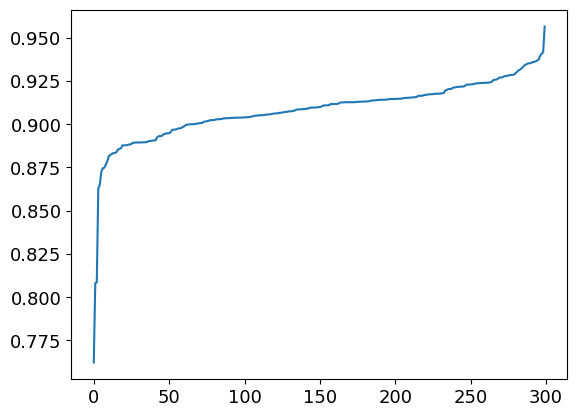

In [570]:
sns.lineplot(trained_1_1_4_4_solution_fs)

<Axes: >

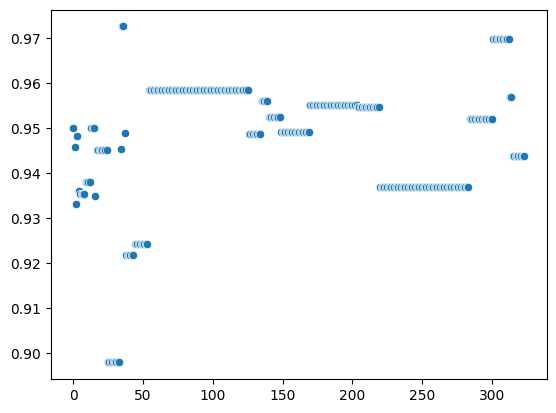

In [305]:
sns.scatterplot(
    scores_kquarter
)

<Axes: >

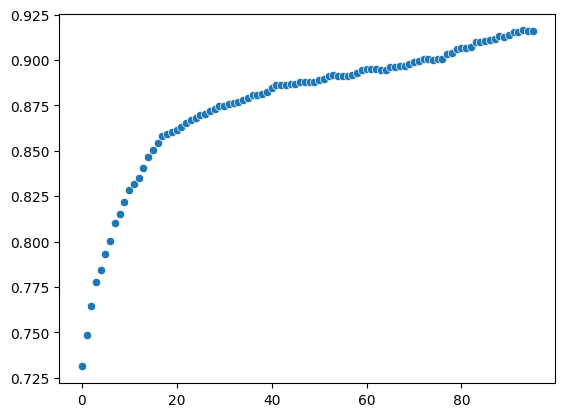

In [180]:
sns.scatterplot(
    ga._aver_score_per_iter
)

#### Fresh Fuel Mutation probability rate

<Axes: >

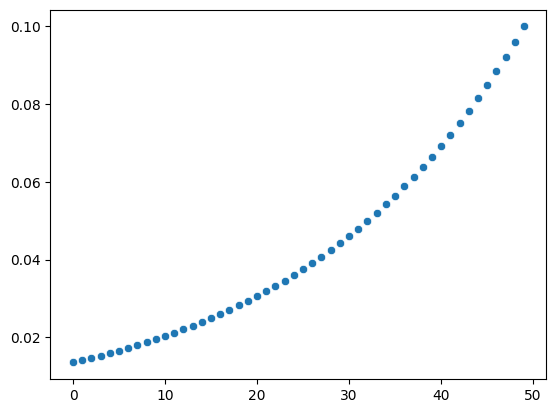

In [38]:
x_raw = np.linspace(28,40,50)
x = ( x_raw - x_raw.min() ) / ( x_raw.max() - x_raw.min() )
sns.scatterplot(np.exp(2*x) / np.exp(2*1) * 0.1)

#### Mutation probability rate

<Axes: >

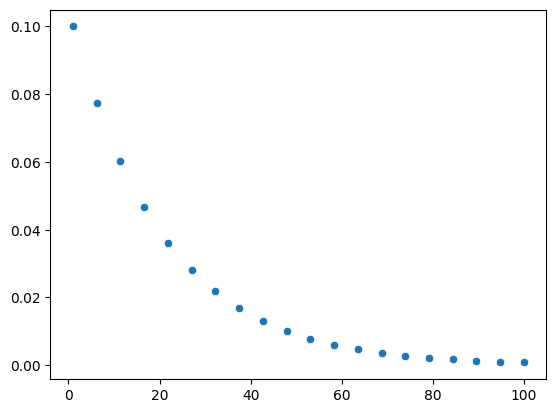

In [41]:
x = np.linspace(1,100,20)
sns.scatterplot(x=x, y=( (1 / np.power(1.05, x)) / ( 1 / np.power(1.05, 1)) ) * 0.1 )

In [88]:
np.asarray(list(map(lambda x: x["k_fa_max"], population))).mean()

1.4829589815728434

#### K burnup symmetry

In [ ]:
x = np.linspace(0,70, 100)

In [ ]:
sns.scatterplot(x=x, y=np.power(1.02, 0) / np.power(1.02, x))
sns.scatterplot(x=x, y=np.power(1.03, 0) / np.power(1.03, x))

In [ ]:
sns.scatterplot(x=x, y=np.power(1.04, 0) / np.power(1.04, x))

In [ ]:
sns.scatterplot(x=x, y=np.power(1.05, 0) / np.power(1.05, x))

#### K sym / k quarter

In [235]:
x = np.linspace(0, 1, 50)

Text(0, 0.5, 'Значение целевой функции f(x)')

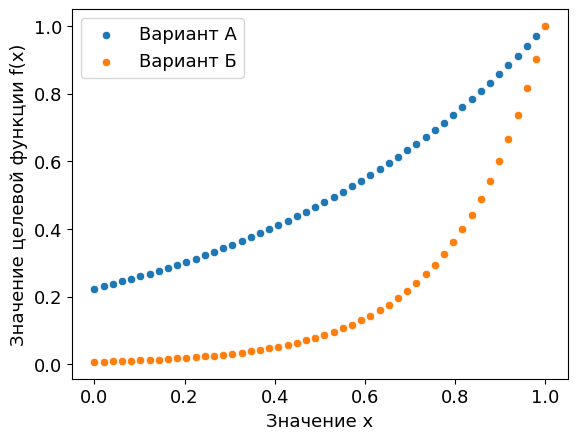

In [236]:
sns.scatterplot(x=x, y=np.exp(1.5*(x - 1)), label="Вариант А")
sns.scatterplot(x=x, y=np.exp(5*(x - 1)), label="Вариант Б")


plt.xlabel("Значение x")
plt.ylabel("Значение целевой функции f(x)")

#### K fa max
#### rapid decreasing after limit exceeded

In [222]:
x_lim = 1.2
x = np.linspace(1.2, 2, 50)

In [223]:
y = x.copy()
# pos, val
stage = [None, None]
for i in range(len(x)):
    if x[i] <= 1.5:
        y[i] = 1 / ( x[i]/x_lim )
        continue
    elif stage[0] is None:
        print("assigning")
        stage[0] = x[i-1]
        stage[1] = y[i-1]
    y[i] = stage[1] * np.exp(-5* x[i] ) / np.exp ( -5* stage[0] )


assigning


<Axes: >

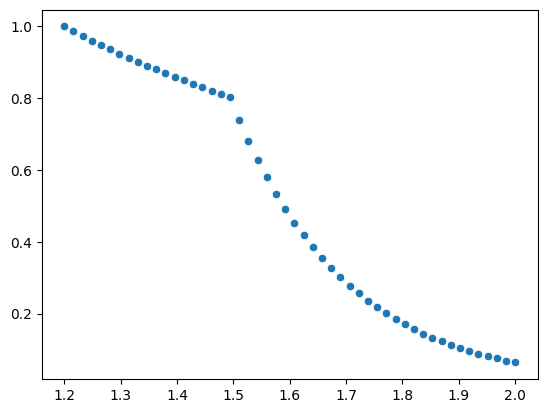

In [224]:
sns.scatterplot(x=x, y=y)

<Axes: >

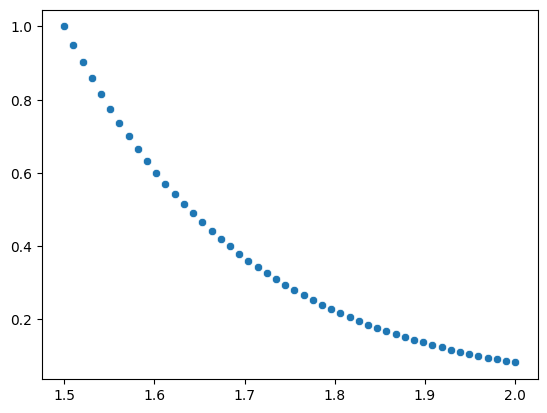

In [227]:
x_lim = 1.5
x = np.linspace(1.5, 2, 50)

sns.scatterplot(x=x, y=np.exp(-5*x) / np.exp(-5*x_lim))